In [1]:
import numpy
import py_entropy
from matplotlib import pyplot
import os

from tqdm.notebook import tqdm

pyplot.rcParams.update({
  "text.usetex": True,
  "font.family": "Helvetica"
})

In [2]:
output_dir = "mixed_charge_imabalance_defect"

os.makedirs(output_dir, exist_ok=True)

In [3]:
ne = 1000
n_layers = 10000
l = 20

ps = numpy.linspace(0.0,0.5,11)

single_filename = os.path.join(output_dir, "mixed_charge_single.npz")

if os.path.exists(single_filename):
    arr = numpy.load(single_filename)
    ps = arr['ps']
    pure_purities = arr['data']
else:
    all_purities = []

    for p in tqdm(ps):
        states = []
        for i in numpy.arange(0,l,2):
            state = numpy.zeros((l,), dtype=numpy.complex128)
            state[i] = 1.0
            if p > 0:
                states.append((2 * p/l, state))
            
        for i in numpy.arange(0,l,2) + 1:
            state = numpy.zeros((l,), dtype=numpy.complex128)
            state[i] = 1.0
            if 1-p > 0:
                states.append((2 * (1-p)/l, state))
        
        part_on_bound = py_entropy.SingleDefectState.new_mixed(states, ne)
        purities = part_on_bound.apply_alternative_layers_and_save_mean_purity(n_layers)
        all_purities.append(purities)
    pure_purities = numpy.array(all_purities)
    numpy.savez(single_filename, ps=ps, data=pure_purities)
    
print(f"Purity shape: {pure_purities.shape}")

  0%|          | 0/11 [00:00<?, ?it/s]

Purity shape: (11, 10000)


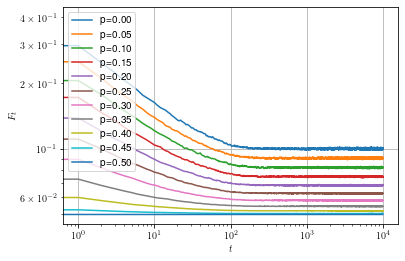

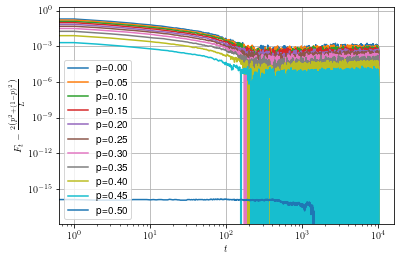

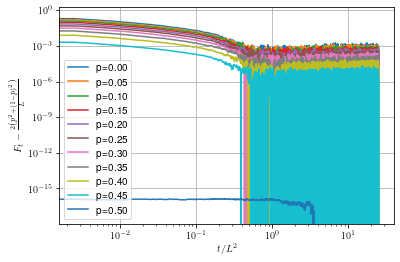

In [9]:
for p, purity in zip(ps, pure_purities):
    pyplot.plot(purity, label="p={:.2f}".format(p))
    
pyplot.xlabel('$t$')
pyplot.ylabel('$F_t$')
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.legend()
pyplot.grid()
pyplot.savefig(os.path.join(output_dir, 'mixing_estimators.pdf'))
pyplot.show()

for p, purity in zip(ps, pure_purities):
    pyplot.plot(purity - 2*(p**2 + (1-p)**2)/l, label="p={:.2f}".format(p))
    
pyplot.xlabel('$t$')
pyplot.ylabel(r'$F_t - \frac{2\left(p^2 + (1-p)^2\right)}{L}$')
pyplot.yscale('log')
pyplot.xscale('log')
pyplot.legend()
pyplot.grid()
pyplot.savefig(os.path.join(output_dir, 'mixing_estimators_offset.pdf'))
pyplot.show()

for p, purity in zip(ps, pure_purities):
    pyplot.plot(numpy.arange(len(purity))/l**2, purity - 2*(p**2 + (1-p)**2)/l, label="p={:.2f}".format(p))
    
pyplot.xlabel('$t/L^2$')
pyplot.ylabel(r'$F_t - \frac{2\left(p^2 + (1-p)^2\right)}{L}$')
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.legend()
pyplot.grid()
pyplot.savefig(os.path.join(output_dir, 'mixing_estimators_offset_scaled.pdf'))
pyplot.show()

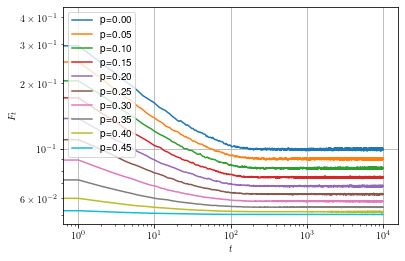

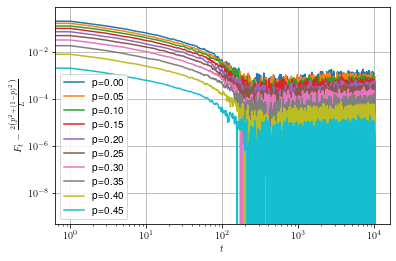

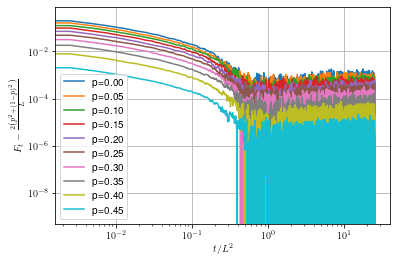

In [10]:
for p, purity in zip(ps[:-1], pure_purities):
    pyplot.plot(purity, label="p={:.2f}".format(p))
    
pyplot.xlabel('$t$')
pyplot.ylabel('$F_t$')
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.legend()
pyplot.grid()
# pyplot.savefig(os.path.join(output_dir, 'mixing_estimators.pdf'))
pyplot.show()

for p, purity in zip(ps[:-1], pure_purities):
    pyplot.plot(purity - 2*(p**2 + (1-p)**2)/l, label="p={:.2f}".format(p))
    
pyplot.xlabel('$t$')
pyplot.ylabel(r'$F_t - \frac{2\left(p^2 + (1-p)^2\right)}{L}$')
pyplot.yscale('log')
pyplot.xscale('log')
pyplot.legend()
pyplot.grid()
# pyplot.savefig(os.path.join(output_dir, 'mixing_estimators_offset.pdf'))
pyplot.show()

for p, purity in zip(ps[:-1], pure_purities):
    pyplot.plot(numpy.arange(len(purity))/l**2, purity - 2*(p**2 + (1-p)**2)/l, label="p={:.2f}".format(p))
    
pyplot.xlabel('$t/L^2$')
pyplot.ylabel(r'$F_t - \frac{2\left(p^2 + (1-p)^2\right)}{L}$')
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.legend()
pyplot.grid()
# pyplot.savefig(os.path.join(output_dir, 'mixing_estimators_offset_scaled.pdf'))
pyplot.show()